## Importing Libraries

In [76]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix

## Importing Fashion dataset from keras


In [64]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,test_labels) = fashion_mnist.load_data()

In [65]:
train_images.shape

(60000, 28, 28)

In [66]:
train_images[0,23,23]

194

In [67]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle Boot']

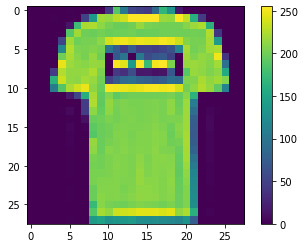

In [68]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.show()

In [69]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## **ANN**

In [70]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [71]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [72]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4975 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3728 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3393 - accuracy: 0.8756
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3139 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2961 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2811 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2708 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2590 - accuracy: 0.9026
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2504 - accuracy: 0.9059
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.241

In [73]:
model.evaluate(test_images, test_labels)


313/313 [==============================] - 1s 2ms/step - loss: 0.3267 - accuracy: 0.8895


[0.3267492353916168, 0.8895000219345093]

Accuracy of ANN: 88.95

## CNN

In [28]:
train_images.shape

(60000, 28, 28)

In [29]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_history = model.fit(train_images, train_labels, epochs=5, validation_split= 0.2)

Epoch 1/5
1500/1500 [==============================] - 17s 11ms/step - loss: 0.4145 - accuracy: 0.8514 - val_loss: 0.3363 - val_accuracy: 0.8773
Epoch 2/5
1500/1500 [==============================] - 16s 10ms/step - loss: 0.2791 - accuracy: 0.8998 - val_loss: 0.2793 - val_accuracy: 0.8988
Epoch 3/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2358 - accuracy: 0.9135 - val_loss: 0.2648 - val_accuracy: 0.9068
Epoch 4/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2008 - accuracy: 0.9257 - val_loss: 0.2489 - val_accuracy: 0.9110
Epoch 5/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1737 - accuracy: 0.9358 - val_loss: 0.2485 - val_accuracy: 0.9126


In [32]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2661 - accuracy: 0.9078


[0.2661222517490387, 0.907800018787384]

### Using CNN we are getting around 90.7% accuracy which is better than ANN (88.5% accuracy)

## Prediction

In [12]:
prediction = model.predict(test_images)
print(class_names[np.argmax(prediction[400])])

T-shirt/top


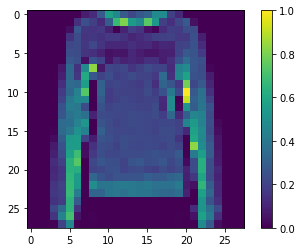

In [13]:
plt.figure()
plt.imshow(train_images[400])
plt.colorbar()
plt.show()